<a href="https://colab.research.google.com/github/AlyssaTang/FutureMakers/blob/main/Sarcasm_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.5.0


##Importing Dataset

In [2]:
import json 
import csv 
from google.colab import files
uploaded = files.upload()

Saving Sarcasm_Headlines_Dataset.json to Sarcasm_Headlines_Dataset.json


In [3]:
def parse_data(file):
  for l in open(file, 'r'):
    yield json.loads(l)

url = 'Sarcasm_Headlines_Dataset.json'

dataset = list(parse_data(url))

In [6]:
dataset = pd.DataFrame(data=dataset)

In [ ]:
dataset

In [7]:
uploaded = files.upload()

Saving Sarcasm_Headlines_Dataset_v2.json to Sarcasm_Headlines_Dataset_v2.json


In [8]:
url = 'Sarcasm_Headlines_Dataset_v2.json'

dataset2 = list(parse_data(url))

In [9]:
dataset2 = pd.DataFrame(data=dataset2)

In [10]:
dataset2 

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [11]:
data_all=pd.concat([dataset,dataset2],axis=0,ignore_index=True)

In [12]:
data_all

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
55323,https://www.theonion.com/jews-to-celebrate-ros...,jews to celebrate rosh hashasha or something,1
55324,https://local.theonion.com/internal-affairs-in...,internal affairs investigator disappointed con...,1
55325,https://www.huffingtonpost.com/entry/andrew-ah...,the most beautiful acceptance speech this week...,0
55326,https://www.theonion.com/mars-probe-destroyed-...,mars probe destroyed by orbiting spielberg-gat...,1


##Tokenization

In [14]:
sentences = data_all['headline'].tolist()
labels = data_all['is_sarcastic'].tolist()
urls = data_all['article_link'].tolist()

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post' #add 0's to the end of a sentence when tokenized into numbers to ensure they're all the same length
oov_tok = "<OOV>" #words that are not in the dictionary; used to maintain size of sentence
training_size = 20000

In [18]:
#splitting testing/training sentences and lebels
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [19]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [20]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [21]:
#finds direction of vectors (on a scale of good to bad essentially) is determined for each word then summed up to get an overall vector

model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length), #learn direction of word 
    tf.keras.layers.GlobalAveragePooling1D(), #adding up vectors
    tf.keras.layers.Dense(24, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.0219 - accuracy: 0.9940 - val_loss: 0.5165 - val_accuracy: 0.9130
Epoch 2/30
625/625 - 3s - loss: 0.0202 - accuracy: 0.9947 - val_loss: 0.5314 - val_accuracy: 0.9128
Epoch 3/30
625/625 - 3s - loss: 0.0238 - accuracy: 0.9929 - val_loss: 0.5350 - val_accuracy: 0.9145
Epoch 4/30
625/625 - 3s - loss: 0.0195 - accuracy: 0.9943 - val_loss: 0.5565 - val_accuracy: 0.9129
Epoch 5/30
625/625 - 3s - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.5753 - val_accuracy: 0.9124
Epoch 6/30
625/625 - 3s - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.6208 - val_accuracy: 0.9087
Epoch 7/30
625/625 - 3s - loss: 0.0147 - accuracy: 0.9964 - val_loss: 0.5853 - val_accuracy: 0.9143
Epoch 8/30
625/625 - 3s - loss: 0.0144 - accuracy: 0.9961 - val_loss: 0.6074 - val_accuracy: 0.9130
Epoch 9/30
625/625 - 3s - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.6171 - val_accuracy: 0.9131
Epoch 10/30
625/625 - 3s - loss: 0.0131 - accuracy: 0.9963 - val_loss: 0.6683 - val_accuracy: 0.9108

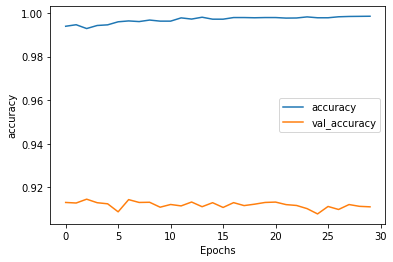

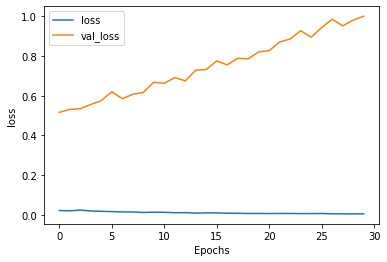

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#the accuracy is pretty high and the loss low, but an improvement could be to use stemming or lemmatization too

In [32]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

#results:
#[[9.9939424e-01] <-- 0.999 is very close to 1, indicating sarcasm
#[5.7165005e-11]] <-- a number very close to 0, indicating no sarcasm

[[9.9939424e-01]
 [5.7165005e-11]]
